In [12]:
from kan import *
import torch
import matplotlib.pyplot as plt

# set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


Exponential

In [13]:
# initialize KAN with grid=3
model_exp = KAN(width=[1,10,1], grid=3, k=3, seed=1, device=device)  # 1 input, 10 nodes in 1 hidden layer, 1 output
#   ? what does k do
#   ? what should grid be

# create dataset
f = lambda x: torch.exp(x[:, [0]])

dataset = create_dataset(f, n_var=1, ranges=[-1.0, 1.0], train_num = 100, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [14]:
# fit and refine
model_exp.fit(dataset, opt="LBFGS", steps=20)   # LBFGS ---- second order optimizer
model_exp = model_exp.refine(10)    # grid=10
model_exp.fit(dataset, opt="LBFGS", steps=20)

| train_loss: 4.10e-05 | test_loss: 4.40e-05 | reg: 1.56e+01 | : 100%|█| 20/20 [00:00<00:00, 22.95it


saving model version 0.1
saving model version 0.2


| train_loss: 4.54e-06 | test_loss: 1.61e-05 | reg: 1.56e+01 | : 100%|█| 20/20 [00:00<00:00, 27.24it

saving model version 0.3


{'train_loss': [array(1.527202e-05, dtype=float32),
  array(1.1520536e-05, dtype=float32),
  array(1.0029831e-05, dtype=float32),
  array(9.372168e-06, dtype=float32),
  array(9.372168e-06, dtype=float32),
  array(7.64174e-06, dtype=float32),
  array(7.119705e-06, dtype=float32),
  array(6.3687517e-06, dtype=float32),
  array(5.9837075e-06, dtype=float32),
  array(5.4955362e-06, dtype=float32),
  array(5.396895e-06, dtype=float32),
  array(5.071916e-06, dtype=float32),
  array(4.7802478e-06, dtype=float32),
  array(4.6828573e-06, dtype=float32),
  array(4.6828573e-06, dtype=float32),
  array(4.53612e-06, dtype=float32),
  array(4.53612e-06, dtype=float32),
  array(4.53612e-06, dtype=float32),
  array(4.53612e-06, dtype=float32),
  array(4.53612e-06, dtype=float32)],
 'test_loss': [array(2.1252954e-05, dtype=float32),
  array(1.8497572e-05, dtype=float32),
  array(1.8301549e-05, dtype=float32),
  array(1.820827e-05, dtype=float32),
  array(1.8208268e-05, dtype=float32),
  array(1.751637

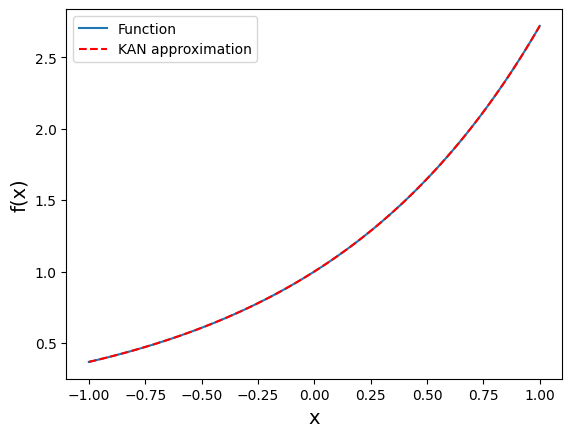

In [15]:
# plot approximation
x_eval = torch.linspace(-1, 1, 100).unsqueeze(1).to(device)

with torch.no_grad():   # no gradient calculation, faster + saves memory
    y_true = torch.exp(x_eval)
    y_pred =  model_exp(x_eval)

# if device == 'cuda' / GPU 
#x_eval = x_eval.cpu().numpy()  
#y_true = y_true.cpu().numpy()
#y_pred = y_pred.cpu().numpy()

plt.plot(x_eval, y_true,label = 'Function')
plt.plot(x_eval, y_pred, 'r--', label = 'KAN approximation')
plt.xlabel('x', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.legend()

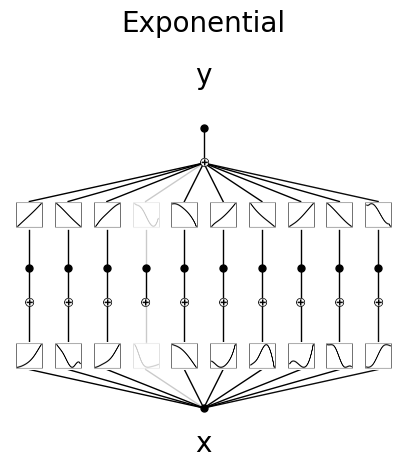

In [ ]:
# plot KAN model
model_exp.plot(beta=100, in_vars=['x'], out_vars=['y'], title = 'Exponential')

Gaussian

In [17]:
# initialize KAN with grid=3
model_gaus = KAN(width=[1,10,1], grid=3, k=3, seed=1, device=device)  # 1 input, 10 nodes in 1 hidden layer, 1 output

# create dataset
mu = 0.0
sigma = 1.0

f = lambda x: torch.exp(-0.5 * ((x[:, [0]] - mu) / sigma)**2)

dataset = create_dataset(f, n_var=1, ranges=[-1.0, 1.0], train_num = 100, device=device)

checkpoint directory created: ./model
saving model version 0.0


In [18]:
# fit and refine
model_gaus.fit(dataset, opt="LBFGS", steps=20)   # LBFGS ---- second order optimizer
model_gaus = model_gaus.refine(10)    # grid=10
model_gaus.fit(dataset, opt="LBFGS", steps=20)

| train_loss: 4.41e-05 | test_loss: 4.63e-05 | reg: 1.23e+01 | : 100%|█| 20/20 [00:00<00:00, 23.23it


saving model version 0.1
saving model version 0.2


| train_loss: 4.40e-06 | test_loss: 5.02e-06 | reg: 1.23e+01 | : 100%|█| 20/20 [00:00<00:00, 31.65it


saving model version 0.3


{'train_loss': [array(6.7711655e-05, dtype=float32),
  array(2.3174738e-05, dtype=float32),
  array(1.05822e-05, dtype=float32),
  array(8.158888e-06, dtype=float32),
  array(7.262048e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(7.0645056e-06, dtype=float32),
  array(6.593632e-06, dtype=float32),
  array(5.8207956e-06, dtype=float32),
  array(5.2912915e-06, dtype=float32),
  array(5.287483e-06, dtype=float32),
  array(5.287483e-06, dtype=float32),
  array(4.797904e-06, dtype=float32),
  array(4.416298e-06, dtype=float32),
  array(4.4035532e-06, dtype=float32),
  array(4.4035532e-06, dtype=float32),
  array(4.4035532e-06, dtype=float32)],
 'test_loss': [array(7.573165e-05, dtype=float32),
  array(2.7902048e-05, dtype=float32),
  array(1.2792472e-05, dtype=float32),
  array(9.362863e-06, dtype=float32),
  array(8.5087695e-06, dtype=float32),
  array(

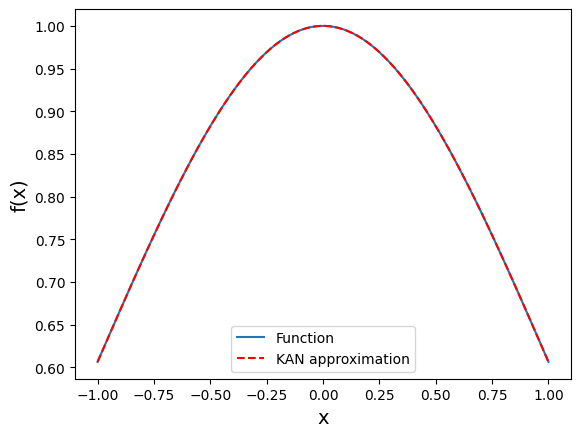

In [20]:
# plot approximation
x_eval = torch.linspace(-1, 1, 100).unsqueeze(1).to(device)

with torch.no_grad():   # no gradient calculation, faster + saves memory
    y_true = torch.exp(-0.5 * ((x_eval - mu) / sigma)**2)
    y_pred =  model_gaus(x_eval)

# if device == 'cuda' / GPU 
#x_eval = x_eval.cpu().numpy()  
#y_true = y_true.cpu().numpy()
#y_pred = y_pred.cpu().numpy()

plt.plot(x_eval, y_true,label = 'Function')
plt.plot(x_eval, y_pred, 'r--', label = 'KAN approximation')
plt.xlabel('x', fontsize = 14)
plt.ylabel('f(x)', fontsize = 14)
plt.legend()

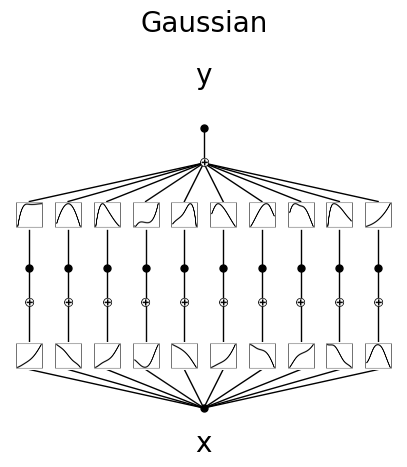

In [21]:
# plot KAN model
model_gaus.plot(beta=100, in_vars=['x'], out_vars=['y'], title = 'Gaussian')